# Comparing linear and nonlinear fits

Import the required modules.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as ss
import scipy.optimize as so

## Read the data

Load the data from a text files.

In [2]:
t, counts = np.genfromtxt('decay_counts.txt', unpack=True)

Plot the data to get a feel for it.

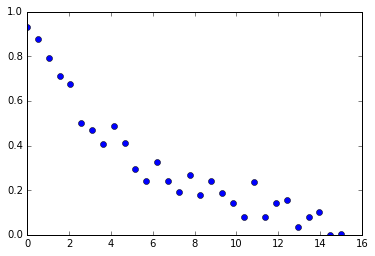

In [9]:
plt.plot(t, counts, 'o');

Looks like it could be an exponential function $C(t) = C_0 e^{-t/\tau}$.

## Nonlinear fit

In [7]:
def decay_count(t, C0, tau):
    return C0*np.exp(-t/tau)

We fit the data using this nonlinear function.

In [8]:
p_opt, cov = so.curve_fit(decay_count, xdata=t, ydata=counts)

In [17]:
C0_f, tau_f = p_opt

Let's plot the resulting function superimposed on the data.

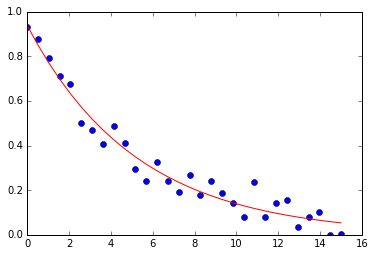

In [19]:
plt.plot(t, counts, 'bo')
plt.plot(t, decay_count(t, C0_f, tau_f), 'r');

## Linear regression

Alternatively, we can transform the data so that it has a linear relation since $\log V(t) = \log C_0 - \frac{t}{\tau}$.

In [11]:
log_counts = np.log(counts)

/home/gjb/miniconda3/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


Oops, something is not right, let's view the result.

In [12]:
log_counts

array([-0.07159937, -0.13105781, -0.23560164, -0.33809597, -0.39176574,
       -0.68717805, -0.75881872, -0.89489949, -0.71732236, -0.89080619,
       -1.22865397, -1.41871182, -1.11870363, -1.4144559 , -1.65688369,
       -1.31130275, -1.72583735, -1.41664147, -1.68586644, -1.96389807,
       -2.51549058, -1.43461795, -2.52872842, -1.94940837, -1.85711487,
       -3.30972961, -2.51325048, -2.2876997 ,        -inf, -5.86409285])

One of the counts was zero, hence its logarithm is $-\infty$.  However, if we filter that vaule out, we can perform a linear regression.

In [15]:
slope, intercept, R, *_ = ss.linregress(t[np.isfinite(log_counts)], log_counts[np.isfinite(log_counts)])

The slope is $-\frac{1}{\tau}$, and the intercept is $\log C_0$, so we can calculate those.

In [16]:
tau_log_f, C0_log_f = -1.0/slope, np.exp(intercept)

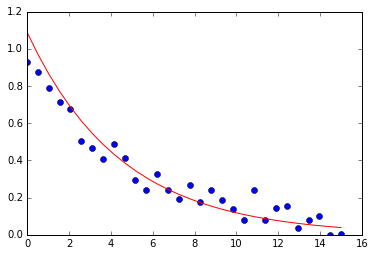

In [20]:
plt.plot(t, counts, 'bo')
plt.plot(t, decay_count(t, C0_log_f, tau_log_f), 'r');

## Comparison

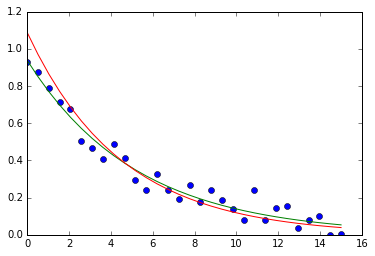

In [22]:
plt.plot(t, counts, 'bo')
plt.plot(t, decay_count(t, C0_f, tau_f), 'g')
plt.plot(t, decay_count(t, C0_log_f, tau_log_f), 'r');

Covariance of the nonlinear curve fit versus the correlation coefficient of the linear regression.

In [23]:
print(cov)
print(R)

[[ 0.00089102 -0.00522099]
 [-0.00522099  0.06556648]]
-0.849858096609


The covariance looks better than the correlation coefficient, so we have more confidence in the former.  Let's compare the respective $C_0$ and $\tau$ values as computed by two algorithms.

In [24]:
print('nonlinear curve fit: C0 = {0:.2f}, tau = {1:.2f}'.format(C0_f, tau_f))
print('linear regression fit: C0 = {0:.2f}, tau = {1:.2f}'.format(C0_log_f, tau_log_f))

nonlinear curve fit: C0 = 0.94, tau = 5.23
linear regression fit: C0 = 1.09, tau = 4.50


The values to generate thedata were $C_0 = 1$ and $\tau = 5$, so indeed, the nonlinear curve fit worked better in this instance..